In [32]:
import pandas as pd

red_wine = pd.read_csv('../data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('../data/winequality-white.csv', sep = ';')

In [33]:
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [34]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [35]:
fig = px.histogram(wine, x='quality', color = 'color')
fig.show()

In [36]:
X = wine.drop(['color'], axis=1)
y = wine['color']

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 13)

np.unique(y_train, return_counts =True)

(array([0., 1.]), array([3913, 1284]))

In [38]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name = 'Test'))

fig.update_layout(barmode = 'overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth = 2, random_state= 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [40]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))



train acc : 0.9553588608812776
test acc : 0.9569230769230769


* min max 는 0과 1 
* standardscaler 는 평균을 0 표준편차를 1 

In [41]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name ='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name ='quality'))

fig.show()

* 칼럼들 데이터의 범위과 다르고 평균과 분산이 각각 다르다.
* 특성의 편향문제를 해결해야 함 

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

NameError: name 'X' is not defined

In [43]:
X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

In [44]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name ='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name ='quality'))

fig.show()

In [45]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name ='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name ='quality'))

fig.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size = 0.2, random_state = 13)

wine_tree = DecisionTreeClassifier(max_depth =2, random_state =13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))


train acc : 0.9553588608812776
test acc : 0.9569230769230769


In [47]:
from sklearn import tree

In [48]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

In [49]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth =2 , random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [51]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))


train acc : 0.7294593034442948
test acc : 0.7161538461538461


[Text(0.5, 0.8333333333333334, 'X[10] <= 10.525\ngini = 0.465\nsamples = 5197\nvalue = [1907, 3290]'),
 Text(0.25, 0.5, 'X[1] <= 0.237\ngini = 0.499\nsamples = 2950\nvalue = [1546, 1404]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.397\nsamples = 791\nvalue = [216, 575]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.473\nsamples = 2159\nvalue = [1330, 829]'),
 Text(0.75, 0.5, 'X[5] <= 13.5\ngini = 0.27\nsamples = 2247\nvalue = [361, 1886]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.439\nsamples = 427\nvalue = [139, 288]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.214\nsamples = 1820\nvalue = [222, 1598]')]

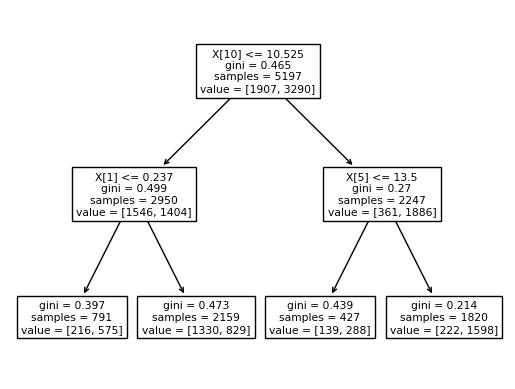

In [52]:
tree.plot_tree(wine_tree)

In [53]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')

In [54]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

In [56]:
print('accuracy :', accuracy_score(y_test, y_pred_test))
print('recall :', recall_score(y_test, y_pred_test))
print('precision :', precision_score(y_test, y_pred_test))
print('AUCscore :', roc_auc_score(y_test, y_pred_test))
print('F1score :', f1_score(y_test, y_pred_test))


accuracy : 0.7161538461538461
recall : 0.7314702308626975
precision : 0.8026666666666666
AUCscore : 0.7105988470875331
F1score : 0.7654164017800381


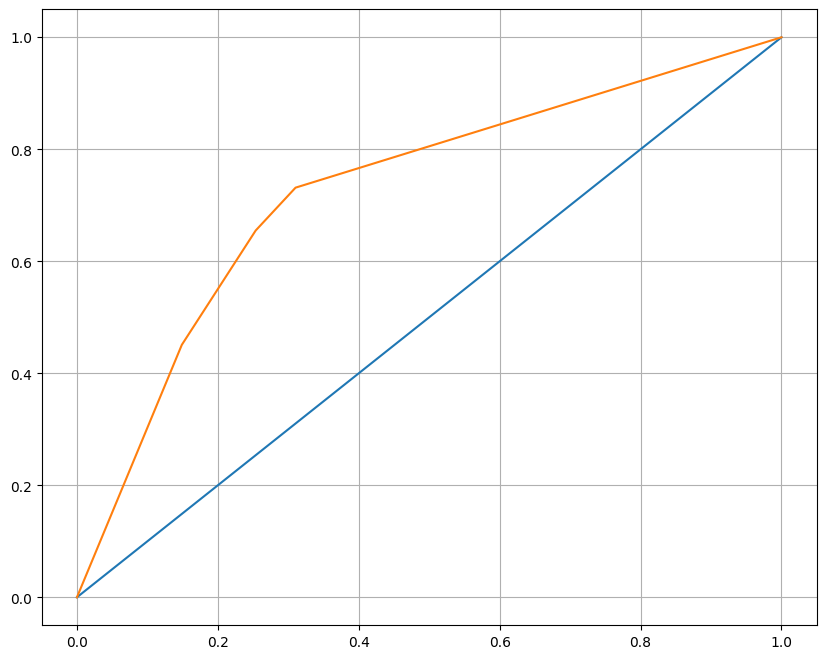

In [57]:
pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr , tpr, thresholds = roc_curve(y_test, pred_proba)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
plt.plot(fpr,tpr)
plt.grid()
plt.show()